In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from zipfile import ZipFile

zf = ZipFile('all.zip')
gender = pd.read_csv(zf.open('gender_submission.csv'))
test = pd.read_csv(zf.open('test.csv'))
train = pd.read_csv(zf.open('train.csv'))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

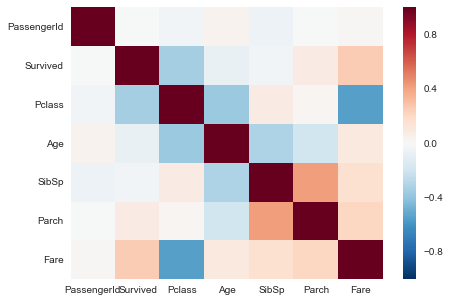

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=[7,5])
sns.heatmap(train.corr())
plt.show()

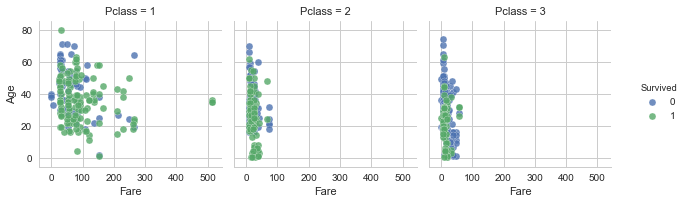

In [6]:
graph = sns.FacetGrid(train,col='Pclass',
                      hue='Survived',
                      margin_titles=True)
graph=graph.map(plt.scatter,
                'Fare','Age',
                edgecolor='w',
                alpha=0.8).add_legend()
plt.show()

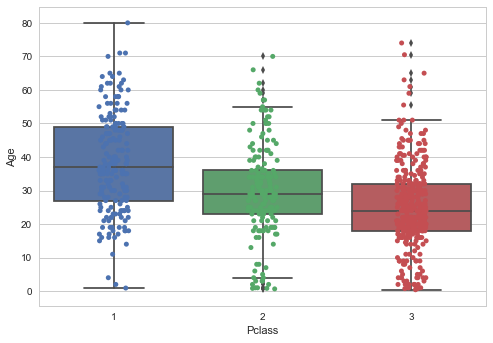

In [7]:
ax= sns.boxplot(x="Pclass", y="Age", data=train)
ax= sns.stripplot(x="Pclass", y="Age", data=train, jitter=True, edgecolor="gray")
plt.show()

Filling the missing value of age

In [8]:
for i in range(len(train.Age)):
    if pd.isnull(train.iloc[i,5]):
        if train.iloc[i,2]==1:
            train.iloc[i,5]=train['Age'].where(train['Pclass']==1).median()
        if train.iloc[i,2]==2:
            train.iloc[i,5]=train['Age'].where(train['Pclass']==2).median()
        if train.iloc[i,2]==3:
            train.iloc[i,5]=train['Age'].where(train['Pclass']==3).median()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
for i in range(len(test.Age)):
    if pd.isnull(test.iloc[i,4]):
        if test.iloc[i,1]==1:
            test.iloc[i,4]=test['Age'].where(test['Pclass']==1).median()
        if test.iloc[i,1]==2:
            test.iloc[i,4]=test['Age'].where(test['Pclass']==2).median()
        if test.iloc[i,1]==3:
            test.iloc[i,4]=test['Age'].where(test['Pclass']==3).median()


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    df.Cabin = df.Cabin.astype('category').cat.codes##category
    return df
def simplify_ages(df):
    df.Age = df.Age.astype('int')
    df.Age = df.Age.astype('float64')
    categories = pd.cut(df.Age,bins=[0, 9, 19, 29, 39, 49, 59, 999],
                    labels=['Child', 'Teenager', 'Young Adult', 
                            'Adult', 'Post Adult', 'Middle Aged', 'Senior'])
    df.Age = categories
    df.Age = df.Age.cat.codes
    return df
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    df.Fare = df.Fare.astype('category').cat.codes
    return df
def simplify_sex(df):
    df.Sex=df.Sex.apply(lambda x: x[0])
    df.Sex=df.Sex.astype('category').cat.codes
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.replace(" ", ""))
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    df.Lname=df.Lname.astype('category').cat.codes
    df.NamePrefix=df.NamePrefix.astype('category').cat.codes
    return df 
def drop(df):
    return df.drop(['Ticket','Name','Embarked'],axis=1)
    

In [12]:
def data_Preprocessing(df):
    df=simplify_cabins(df)
    df=simplify_ages(df)
    df=simplify_fares(df)
    df=simplify_sex(df)
    df=format_name(df)
    df=drop(df)
    return df

In [13]:
simplify_cabins(train)
simplify_ages(train)
simplify_fares(train)
simplify_sex(train)
format_name(train)
train=drop(train)

In [19]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,6,1,0,0,7,108,17
1,2,1,1,0,0,1,0,3,2,190,18
2,3,1,3,0,6,0,0,0,7,353,14
3,4,1,1,0,0,1,0,3,2,272,18
4,5,0,3,1,0,0,0,1,7,15,17
5,6,0,3,1,6,0,0,1,7,554,17
6,7,0,1,1,2,0,0,3,4,515,17
7,8,0,3,1,1,3,1,2,7,624,11
8,9,1,3,0,6,0,2,1,7,412,18
9,10,1,2,0,5,1,0,2,7,576,18


Classifiers

In [26]:
x_all= train.drop(['PassengerId','Survived'],axis=1)
y_all= train['Survived']
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, 
                                                    test_size=0.2,
                                                    random_state=100)

Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
RFC=RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_score=make_scorer(accuracy_score)

grid_obj=GridSearchCV(RFC,parameters,scoring=acc_score)
grid_obj=grid_obj.fit(X_train,y_train)

RFC=grid_obj.best_estimator_


In [30]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
RFC_prediction=RFC.predict(X_test)
RFC_score = accuracy_score(y_test,RFC_prediction)
print(RFC_score)

0.8212290502793296
